In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
train = pd.read_csv("train.csv")
del train[train.columns[0]]


test = pd.read_csv("test.csv")
del test[test.columns[0]]

df = pd.concat([train,test])

df= df.head(20000)

In [4]:
#df.to_csv('out.csv', index=False) 

#print(df.dtypes)
#print(df.columns)
#df["Gender"].unique()
#df["Customer Type"].unique()
#df["Type of Travel"].unique()
#df["Class"].unique()
#df["satisfaction"].unique()



df.loc[df['Gender'] == "Male", 'Gender'] = 0
df.loc[df['Gender'] == "Female", 'Gender'] = 1

df.loc[df['Customer Type'] == "disloyal Customer", 'Customer Type'] = 0
df.loc[df['Customer Type'] == "Loyal Customer", 'Customer Type'] = 1

df.loc[df['Type of Travel'] == "Business travel", 'Type of Travel'] = 0
df.loc[df['Type of Travel'] == "Personal Travel", 'Type of Travel'] = 1

df.loc[df['Class'] == "Eco", 'Class'] = 0
df.loc[df['Class'] == "Eco Plus", 'Class'] = 1
df.loc[df['Class'] == "Business", 'Class'] = 2

#df.loc[df['satisfaction'] == "neutral or dissatisfied", 'satisfaction'] = 0
#df.loc[df['satisfaction'] == "satisfied", 'satisfaction'] = 1
#df["satisfaction"]

In [5]:
df = df.dropna()

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["satisfaction"], axis=1)
Y = df["satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Y.value_counts()

(15959, 23)
(3990, 23)
(15959,)
(3990,)


satisfaction
neutral or dissatisfied    11213
satisfied                   8736
Name: count, dtype: int64

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Linear

In [9]:
clf = make_pipeline(StandardScaler(), SVC(C=0.5, kernel="linear"))
model =clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [10]:
cmatrix = confusion_matrix(y_test, y_pred) 
creport = classification_report(y_test, y_pred, zero_division= 0, output_dict = True)

print(cmatrix)
print(creport)

[[2048  199]
 [ 309 1434]]
{'neutral or dissatisfied': {'precision': 0.8689011455239711, 'recall': 0.9114374721851357, 'f1-score': 0.8896611642050389, 'support': 2247}, 'satisfied': {'precision': 0.8781383955909369, 'recall': 0.8227194492254734, 'f1-score': 0.8495260663507108, 'support': 1743}, 'accuracy': 0.8726817042606516, 'macro avg': {'precision': 0.873519770557454, 'recall': 0.8670784607053046, 'f1-score': 0.8695936152778749, 'support': 3990}, 'weighted avg': {'precision': 0.8729363652900667, 'recall': 0.8726817042606516, 'f1-score': 0.8721284635634113, 'support': 3990}}


In [11]:
class_report = pd.DataFrame(creport).transpose()
class_report

,precision,recall,f1-score,support
neutral or dissatisfied,0.868901,0.911437,0.889661,2247.000000
satisfied,0.878138,0.822719,0.849526,1743.000000
accuracy,0.872682,0.872682,0.872682,0.872682
macro avg,0.873520,0.867078,0.869594,3990.000000
weighted avg,0.872936,0.872682,0.872128,3990.000000


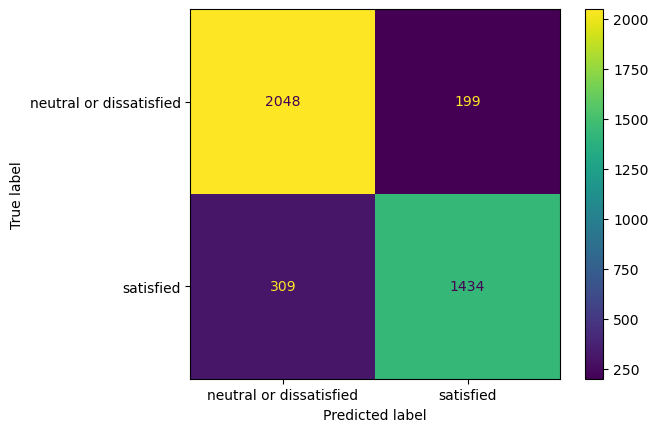

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix,display_labels=clf.classes_)
disp.plot()
plt.show()

Polynomial

In [13]:
clf = SVC(C=0.5, kernel="poly", degree= 2)
model =clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [14]:
cmatrix = confusion_matrix(y_test, y_pred) 
creport = classification_report(y_test, y_pred, zero_division= 0, output_dict = True)

print(cmatrix)
print(creport) 

[[2155   92]
 [1463  280]]
{'neutral or dissatisfied': {'precision': 0.595632946379215, 'recall': 0.9590565198041834, 'f1-score': 0.7348678601875535, 'support': 2247}, 'satisfied': {'precision': 0.7526881720430108, 'recall': 0.1606425702811245, 'f1-score': 0.2647754137115839, 'support': 1743}, 'accuracy': 0.6102756892230576, 'macro avg': {'precision': 0.6741605592111128, 'recall': 0.5598495450426539, 'f1-score': 0.4998216369495687, 'support': 3990}, 'weighted avg': {'precision': 0.6642412818007679, 'recall': 0.6102756892230576, 'f1-score': 0.5295116862006826, 'support': 3990}}


In [15]:
class_report = pd.DataFrame(creport).transpose()
class_report

,precision,recall,f1-score,support
neutral or dissatisfied,0.595633,0.959057,0.734868,2247.000000
satisfied,0.752688,0.160643,0.264775,1743.000000
accuracy,0.610276,0.610276,0.610276,0.610276
macro avg,0.674161,0.559850,0.499822,3990.000000
weighted avg,0.664241,0.610276,0.529512,3990.000000


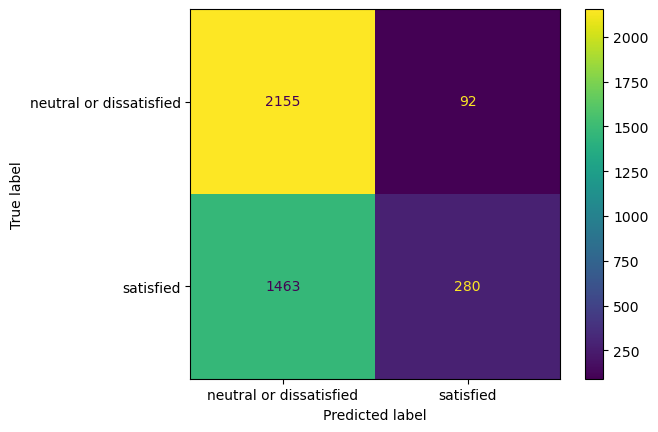

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix,display_labels=clf.classes_)
disp.plot()
plt.show()

RBF

In [17]:
clf = SVC(C=0.5, kernel="rbf")
model =clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [18]:
cmatrix = confusion_matrix(y_test, y_pred) 
creport = classification_report(y_test, y_pred, zero_division= 0, output_dict = True)

print(cmatrix)
print(creport)  

[[2197   50]
 [1536  207]]
{'neutral or dissatisfied': {'precision': 0.5885346905973747, 'recall': 0.9777481085892301, 'f1-score': 0.7347826086956522, 'support': 2247}, 'satisfied': {'precision': 0.8054474708171206, 'recall': 0.11876075731497418, 'f1-score': 0.20700000000000002, 'support': 1743}, 'accuracy': 0.6025062656641604, 'macro avg': {'precision': 0.6969910807072477, 'recall': 0.5482544329521022, 'f1-score': 0.4708913043478261, 'support': 3990}, 'weighted avg': {'precision': 0.6832913261670532, 'recall': 0.6025062656641604, 'f1-score': 0.504224942791762, 'support': 3990}}


In [19]:
class_report = pd.DataFrame(creport).transpose()
class_report

,precision,recall,f1-score,support
neutral or dissatisfied,0.588535,0.977748,0.734783,2247.000000
satisfied,0.805447,0.118761,0.207000,1743.000000
accuracy,0.602506,0.602506,0.602506,0.602506
macro avg,0.696991,0.548254,0.470891,3990.000000
weighted avg,0.683291,0.602506,0.504225,3990.000000


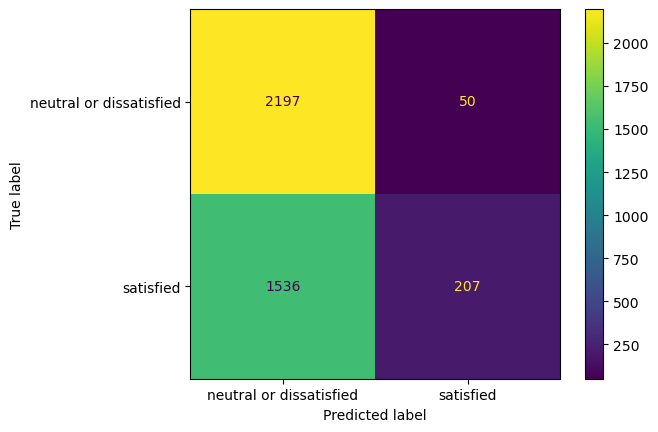

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix,display_labels=clf.classes_)
disp.plot()
plt.show()

sigmoid

In [21]:
clf = SVC(C=0.5, kernel="sigmoid")
model =clf.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [22]:
cmatrix = confusion_matrix(y_test, y_pred) 
creport = classification_report(y_test, y_pred, zero_division= 0, output_dict = True)

print(cmatrix)
print(creport)  

[[1247 1000]
 [ 971  772]]
{'neutral or dissatisfied': {'precision': 0.5622182146077548, 'recall': 0.5549621717846017, 'f1-score': 0.5585666293393058, 'support': 2247}, 'satisfied': {'precision': 0.435665914221219, 'recall': 0.4429145152036718, 'f1-score': 0.43926031294452345, 'support': 1743}, 'accuracy': 0.5060150375939849, 'macro avg': {'precision': 0.49894206441448685, 'recall': 0.4989383434941368, 'f1-score': 0.49891347114191464, 'support': 3990}, 'weighted avg': {'precision': 0.5069348412810049, 'recall': 0.5060150375939849, 'f1-score': 0.5064486069142167, 'support': 3990}}


In [23]:
class_report = pd.DataFrame(creport).transpose()
class_report

,precision,recall,f1-score,support
neutral or dissatisfied,0.562218,0.554962,0.558567,2247.000000
satisfied,0.435666,0.442915,0.439260,1743.000000
accuracy,0.506015,0.506015,0.506015,0.506015
macro avg,0.498942,0.498938,0.498913,3990.000000
weighted avg,0.506935,0.506015,0.506449,3990.000000


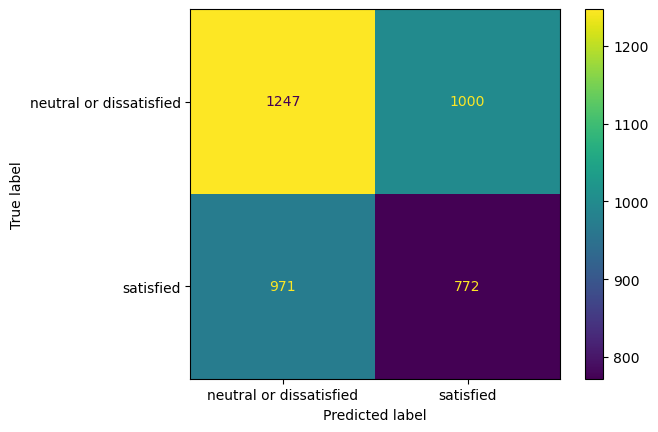

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix,display_labels=clf.classes_)
disp.plot()
plt.show()